In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import eli5
from eli5.sklearn import PermutationImportance

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('./datasets/heart.csv')

df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


- age
- sex:
    - 1 = male
    - 0 = female
- cp: chest pain experienced
    - 0 = typical angina
    - 1 = atypical angina
    - 2 = non-anginal pain
    - 3 = asymptomatic
- trestbps: person's resting blood pressure
- chol: cholesterol measurment (mg/dl)
- fbs: person's fasting blood sugar
    - 1 = more than 120 mg/dl
    - 0 = less than 120 mg/dl
- restecdg: resting electrocardiographic measurment
    - 0 = normal
    - 1 = having ST-T wave abnormality
    - 2 = showing probable or definite left ventricular hypertrophy
- thalach: max heart rate
- exang: exercise induced angina
    - 1 = yes
    - 0 = no
- oldpeak: ST depression induced by exercise relative to rest
- slope: slope of the peak exercise ST segment
    - 0 = upsloping
    - 1 = flat
    - 2 = downsloping
- ca: number of major vessels (0 - 4)
- thal: blood disorder called thalassemia
    - 1 = normal
    - 2 = fixed defect
    - 3 = reversable defect
- target: heart disease
    - 0 = no
    - 1 = yes
   

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['cp'][df['cp'] == 0] = 'typical angina'
df['cp'][df['cp'] == 1] = 'atypical angina'
df['cp'][df['cp'] == 2] = 'non-anginal pain'
df['cp'][df['cp'] == 3] = 'asymptomatic'

df['fbs'][df['fbs'] == 0] = 'less than 120 mg/dl'
df['fbs'][df['fbs'] == 1] = 'more than 120 mg/dl'

df['restecg'][df['restecg'] == 0] = 'normal'
df['restecg'][df['restecg'] == 1] = 'ST-T wave abnormality'
df['restecg'][df['restecg'] == 2] = 'left ventricular hypertrophy'

df['exang'][df['exang'] == 0] = 'no'
df['exang'][df['exang'] == 1] = 'yes'

df['slope'][df['slope'] == 0] = 'upslpoing'
df['slope'][df['slope'] == 1] = 'flat'
df['slope'][df['slope'] == 2] = 'downsloping'

df['thal'][df['thal'] == 1] = 'normal'
df['thal'][df['thal'] == 2] = 'fixed defect'
df['thal'][df['thal'] == 3] = 'reversable defect'


/Users/siro/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/siro/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/siro/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,asymptomatic,145,233,more than 120 mg/dl,normal,150,no,2.3,upslpoing,0,normal,1
1,37,male,non-anginal pain,130,250,less than 120 mg/dl,ST-T wave abnormality,187,no,3.5,upslpoing,0,fixed defect,1
2,41,female,atypical angina,130,204,less than 120 mg/dl,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,male,atypical angina,120,236,less than 120 mg/dl,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,1
4,57,female,typical angina,120,354,less than 120 mg/dl,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,1


In [6]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

In [7]:
df = pd.get_dummies(df, drop_first=True)

In [8]:
df.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_male,cp_atypical angina,cp_non-anginal pain,cp_typical angina,fbs_more than 120 mg/dl,restecg_left ventricular hypertrophy,restecg_normal,exang_yes,slope_flat,slope_upslpoing,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0
1,37,130,250,187,3.5,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0
2,41,130,204,172,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
3,56,120,236,178,0.8,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size = 0.2,
                                                   random_state=10)

In [10]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [11]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [12]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

In [13]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [14]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)


In [15]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])

print('Sensitivity: ', sensitivity)

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])

print('Specificity: ', specificity)

Sensitivity:  0.8387096774193549
Specificity:  0.7


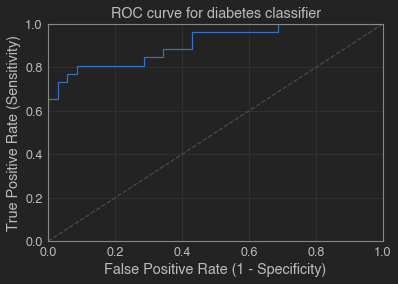

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [20]:
auc(fpr, tpr)

0.9087912087912088